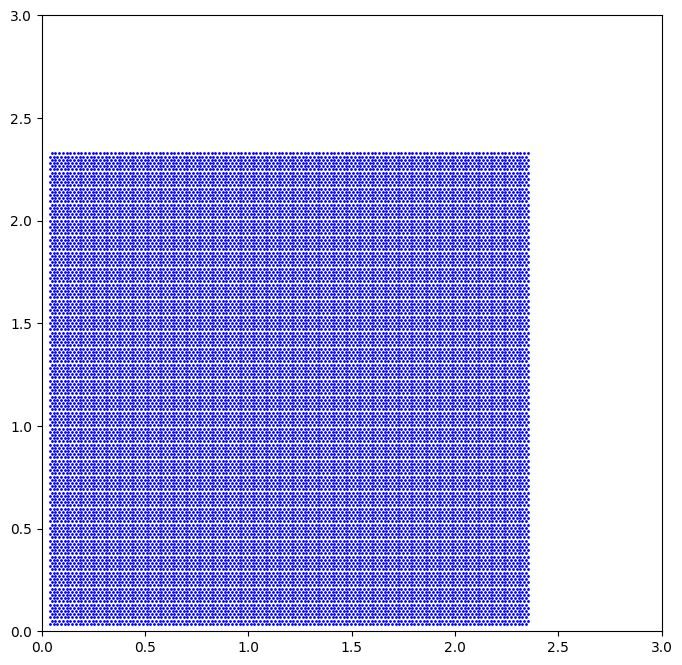

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load data from file
def load_data(file_path):
    with open(file_path, 'r') as file:
        frames = []
        for line in file:
            points = np.fromstring(line, dtype=float, sep=' ')  # Use whitespace as separator
            frames.append(points.reshape(-1, 2))  # Reshape to (N, 2) for x, y pairs
        return frames

# Animation update function
def update(frame_index):
    points.set_offsets(frames[frame_index])
    return points,

# Load data

file_path = "OutputData/res.txt"
frames = load_data(file_path)
num_frames = len(frames)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 3)  # Adjust based on your data range
ax.set_ylim(0, 3)  # Adjust based on your data range
points = ax.scatter([], [], s=1, c='blue')  # Initialize scatter plot with small points

# Initialize animation
ani = FuncAnimation(
    fig, update, frames=num_frames, interval=1, blit=True
)

plt.show()

In [11]:
%matplotlib qt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
# Function to lazily load a single frame from file
def load_frame(file_path, frame_index):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i == frame_index:
                points = np.fromstring(line, dtype=float, sep=' ')
                return points.reshape(-1, 2)  # Reshape to (N, 2) for x, y pairs
    raise IndexError(f"Frame {frame_index} is out of range.")

# Update function for slider
def update(val):
    frame_index = int(slider.val)  # Get current slider value
    frame_data = load_frame(file_path, frame_index)
    points.set_offsets(frame_data)
    fig.canvas.draw_idle()  # Redraw the canvas

# File path
file_path = "OutputData/res.txt"

# Determine the number of frames by counting lines
with open(file_path, 'r') as file:
    num_frames = sum(1 for _ in file)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))
plt.subplots_adjust(bottom=0.2)  # Make space for the slider
ax.set_xlim(-10, 3)  # Adjust based on your data range
ax.set_ylim(-10, 3)  # Adjust based on your data range
points = ax.scatter([], [], s=1, c='blue')  # Initialize scatter plot with small points

# Add slider for frame control
ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03], facecolor='lightgray')  # Slider position
slider = Slider(ax_slider, 'Frame', 0, num_frames - 1, valinit=0, valstep=1)

# Connect slider to update function
slider.on_changed(update)

# Initialize with the first frame
update(0)

plt.show()